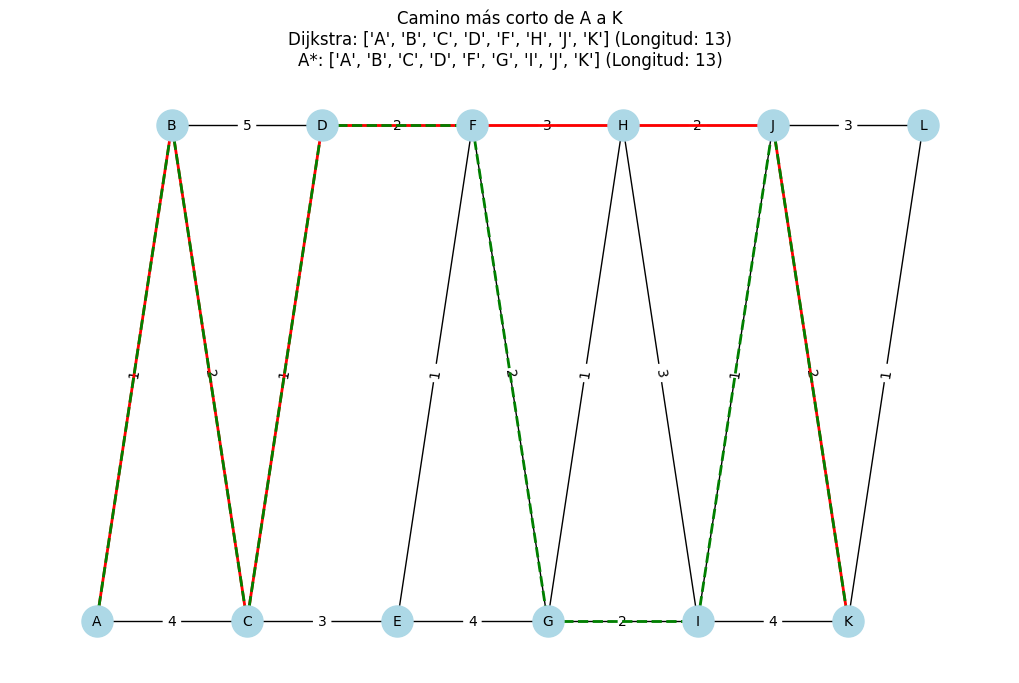

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Crear el grafo ponderado a partir de un diccionario
graph_dict = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1, 'E': 3},
    'D': {'B': 5, 'C': 1, 'F': 2},
    'E': {'C': 3, 'F': 1, 'G': 4},
    'F': {'D': 2, 'E': 1, 'G': 2, 'H': 3},
    'G': {'E': 4, 'F': 2, 'H': 1, 'I': 2},
    'H': {'F': 3, 'G': 1, 'I': 3, 'J': 2},
    'I': {'G': 2, 'H': 3, 'J': 1, 'K': 4},
    'J': {'H': 2, 'I': 1, 'K': 2, 'L': 3},
    'K': {'I': 4, 'J': 2, 'L': 1},
    'L': {'J': 3, 'K': 1}
}
G = nx.Graph()

for node, edges in graph_dict.items():
    for neighbor, weight in edges.items():
        G.add_edge(node, neighbor, weight=weight)

# Definir posiciones de los nodos para la heurística
pos = {
    'A': np.array([-1, -1]),
    'B': np.array([0, 1]),
    'C': np.array([1, -1]),
    'D': np.array([2, 1]),
    'E': np.array([3, -1]),
    'F': np.array([4, 1]),
    'G': np.array([5, -1]),
    'H': np.array([6, 1]),
    'I': np.array([7, -1]),
    'J': np.array([8, 1]),
    'K': np.array([9, -1]),
    'L': np.array([10, 1])
}

# Función heurística (distancia euclidiana)
def heuristica(u, v):
    return np.linalg.norm(pos[u] - pos[v])

# Solicitar al usuario los nodos de inicio y fin
comienzo = input("Ingrese el nodo de inicio: ")
final = input("Ingrese el nodo de fin: ")

# Calcular el camino más corto y su longitud usando Dijkstra
camino_dijkstra = nx.dijkstra_path(G, comienzo, final)
camino_dijkstra_longitud = nx.dijkstra_path_length(G, comienzo, final)

# Calcular el camino más corto y su longitud usando A* con heurística
camino_astar = nx.astar_path(G, comienzo, final, heuristic=heuristica)
camino_astar_longitud = nx.astar_path_length(G, comienzo, final, heuristic=heuristica)

# Mostrar el grafo y el camino más corto
plt.figure(figsize=(10, 6))

# Dibujar nodos y aristas
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Resaltar el camino más corto usando Dijkstra
resultado_dijkstra = list(zip(camino_dijkstra, camino_dijkstra[1:]))
nx.draw_networkx_edges(G, pos, edgelist=resultado_dijkstra, edge_color='r', width=2)

# Resaltar el camino más corto usando A*
resultado_astar = list(zip(camino_astar, camino_astar[1:]))
nx.draw_networkx_edges(G, pos, edgelist=resultado_astar, edge_color='g', width=2, style='dashed')

plt.title(f"Camino más corto de {comienzo} a {final}\n"
          f"Dijkstra: {camino_dijkstra} (Longitud: {camino_dijkstra_longitud})\n"
          f"A*: {camino_astar} (Longitud: {camino_astar_longitud})")
plt.show()